Given the open system model in the chain form:

$$
\widehat{H}=\widehat{H}_{s}+g\widehat{V}_{s}^{\dagger}\widehat{a}_{0}+g\widehat{a}_{0}^{\dagger}\widehat{V}_{s}+\widehat{H}_{e}
$$

$$
\widehat{H}_{e}=\sum_{j=0}^{\infty}\left\{ \varepsilon_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j}+h_{j}\widehat{a}_{j}^{\dagger}\widehat{a}_{j+1}+h_{j}\widehat{a}_{j+1}^{\dagger}\widehat{a}_{j}\right\}
$$

we switch into the interaction picture with respect to the free environment:

$$
\widehat{H}\left(t\right)=\widehat{H}_{s}+g\widehat{V}_{s}^{\dagger}\widehat{a}_{0}\left(t\right)+g\widehat{a}_{0}^{\dagger}\left(t\right)\widehat{V}_{s}
$$

Here:

$$
\widehat{a}_{0}\left(t\right)=\sum_{k=1}^{\infty}\alpha_{k}\left(t\right)\widehat{a}_{k}
$$

The coefficients 

$$
\alpha_{k}\left(t\right)
$$

yield the spread of the interation picture operator $\widehat{a}_{0}\left(t\right)$ over the chain sites $\widehat{a}_{k}$.

The spread coefficients satisfy the following differential equation:

$$
i\partial_{t}\alpha_{k}\left(t\right)=\varepsilon_{k}\alpha_{k}\left(t\right)+h_{k}\alpha_{k+1}\left(t\right)+h_{k-1}\alpha_{k-1}\left(t\right)
$$

with the initial condition:

$$
\alpha_{k}\left(0\right)=\delta_{k0}
$$

Let us solve this equation for the case when on-site energies of the site $\varepsilon_{j}\equiv 1,h_{j}\equiv 0.05$.

First we form the tridiagonal matrix:

$$
   H = \left[\begin{array}{cccc}
\varepsilon & h & 0 & \dots\\
h & \varepsilon & h & \dots\\
0 & h & \varepsilon & \dots\\
\vdots &  & \vdots & \ddots
\end{array}\right]
$$ (H_one_quantum)

And then solve the resulting first-quantized Schrodinger equation

In [1]:
import numpy as np
import lightcones.linalg as la
from lightcones.solvers.schrodinger import solve
import matplotlib.pyplot as plt

In [2]:
n_sites = 100
# on-site energies
es = [1]*n_sites
# hoppings
hs = [0.05]*(n_sites-1)
H = la.tridiag(es, hs)

tmax = 800
dt = 0.01
t = np.arange(start = 0, stop = tmax, step = dt)
nt = t.size

phi_0 = np.zeros(n_sites, dtype = complex)
phi_0[0] = 1 # initially quantum is on the site 0

phi_lc = np.zeros((n_sites, nt), dtype = np.cdouble) # Here we store the propagated orbitals

def apply_h(ti, phi_in, phi_out):
    la.mv(H, phi_in, phi_out, cout=1)

def eval_o(ti, phi):
    phi_lc[:, ti] = phi
    
solve(0, nt-1, dt, apply_h, phi_0, eval_o = eval_o)

Here we plot $\left|\alpha_{k}\left(t\right)\right|$

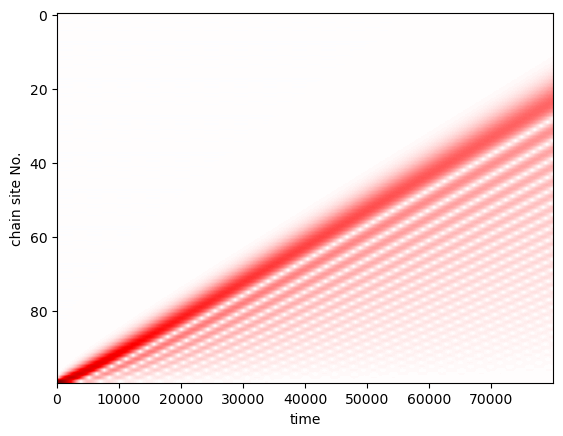

In [3]:
max_ = np.max(np.abs(phi_lc))
im = plt.imshow(np.flip(np.abs(phi_lc), axis=0), aspect='auto', cmap = 'seismic', vmin = - max_, vmax = max_)
plt.xlabel('time')
plt.ylabel('chain site No.')
plt.savefig('coupling_site_spread.eps', format = 'eps')

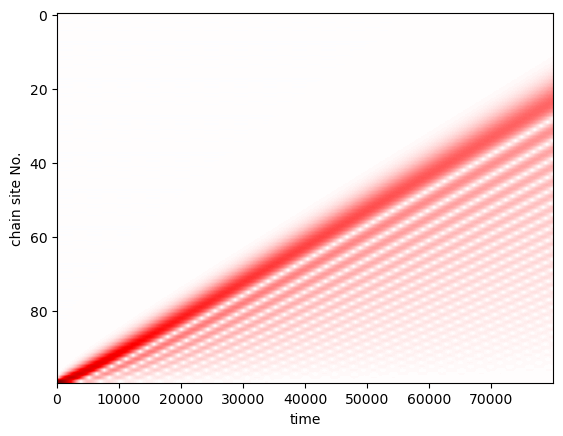

In [6]:
# Out package contains function lightcones.spread which computes the above spread
# in one call:
import lightcones
alpha = lightcones.spread(es, hs, nt, dt) 

# let us plot it once more
max_ = np.max(np.abs(alpha))
im = plt.imshow(np.flip(np.abs(alpha), axis=0), aspect='auto', cmap = 'seismic', vmin = - max_, vmax = max_)
plt.xlabel('time')
plt.ylabel('chain site No.')
plt.savefig('coupling_site_spread.eps', format = 'eps')

<div>
    <img src="./pictures/pic_10.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_11.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_12.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_13.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_14.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_15.jpg" width="480" title="">
</div>
<div>
    <img src="./pictures/pic_16.jpg" width="480" title="">
</div>